In [1]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
%matplotlib inline

/Users/leanderdiaz-bone/Developer/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/leanderdiaz-bone/Developer/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/Applications/Anaconda/anaconda3/envs/scvi-tools-dev-n/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_tar

In [2]:
adata = sc.read(
    "data/lung_atlas.h5ad",
    backup_url="https://figshare.com/ndownloader/files/24539942",
)

In [3]:
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor="cell_ranger", batch_key="batch")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)
adata = adata[:, adata.var.highly_variable].copy()
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]
scanoramaPredict(adata)

Found 4000 genes among all datasets
[[0.00000000e+00 5.26548673e-01 2.69911504e-01 1.19469027e-01
  4.69026549e-01 1.30530973e-01 2.32300885e-02 5.97345133e-02
  3.31858407e-03 2.21238938e-03 9.95575221e-03 7.74336283e-03
  2.21238938e-03 4.42477876e-03 2.65486726e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.97402597e-01 2.54527163e-01
  3.06841046e-01 4.08953722e-01 5.13078471e-02 3.31991952e-02
  3.52112676e-03 2.41134752e-02 2.36418511e-02 9.05432596e-03
  1.86915888e-02 1.45875252e-02 1.51753009e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.50649351e-01
  7.22943723e-01 6.01731602e-01 2.81385281e-02 1.94805195e-02
  1.08225108e-02 1.29870130e-02 5.62770563e-02 1.08225108e-02
  6.49350649e-03 2.16450216e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.40016814e-01 2.88599522e-01 1.40921409e-02 6.18982118e-03
  1.63132137e-03 8.51063830e-03 3.49127182e-02 7.88381743e-03
  1.40186916e-03 0.00000000e+00

In [5]:
adata.write_h5ad(filename="data/adataLung4.h5ad")

In [4]:
adata = anndata.read_h5ad(filename="data/adataLung4.h5ad")
adata

AnnData object with n_obs × n_vars = 32472 × 4000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [5]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal",max_epochs=200,log=True,logname="sd200epLungBench",early_stopping=True)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/sd200epLungBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [06:15<00:00,  1.98s/it, v_num=0, train_loss_step=827, train_loss_epoch=870]    

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:15<00:00,  1.88s/it, v_num=0, train_loss_step=827, train_loss_epoch=870]


In [7]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus",max_epochs=200,log=True,logname="mog200epLungBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/mog200epLungBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [06:46<00:00,  1.94s/it, v_num=0, train_loss_step=784, train_loss_epoch=869]    

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:46<00:00,  2.03s/it, v_num=0, train_loss_step=784, train_loss_epoch=869]


In [8]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp",max_epochs=200,log=True,logname="vamp200epLungBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/vamp200epLungBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 148/200:  74%|███████▍  | 148/200 [05:40<01:59,  2.30s/it, v_num=0, train_loss_step=809, train_loss_epoch=866]    
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 929.541. Signaling Trainer to stop.


In [9]:
flowAdata, vaeNF = trainModelBenchmark(adata.copy(), 'normalflow', max_epochs=100, log=True, logname="flow100epLungBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/flow100epLungBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [14:48<00:00,  8.75s/it, v_num=0, train_loss_step=868, train_loss_epoch=866]    

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [14:48<00:00,  8.88s/it, v_num=0, train_loss_step=868, train_loss_epoch=866]


In [10]:
allAdata = sdnormalAdata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]
allAdata.obsm["scVINF"] = flowAdata.obsm["scVI"]

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.4629906415939331
Embeddings:  17%|█▋        | 1/6 [00:39<03:17, 39.40s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5239854902029037
Embeddings:  33%|███▎      | 2/6 [03:33<07:55, 118.91s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5269240029156208
Embeddings:  50%|█████     | 3/6 [04:07<04:00, 80.08s/it] INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5156532861292362
Embeddings:  67%|██████▋   | 4/6 [04:41<02:03, 61.59s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.48841604497283697
Embeddings:  83%|████████▎ | 5/6 [05:12<00:50, 50.64s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5354651100933552
Embeddings: 100%|██████████| 6/6 [05:41<00:00, 56.97s/it]


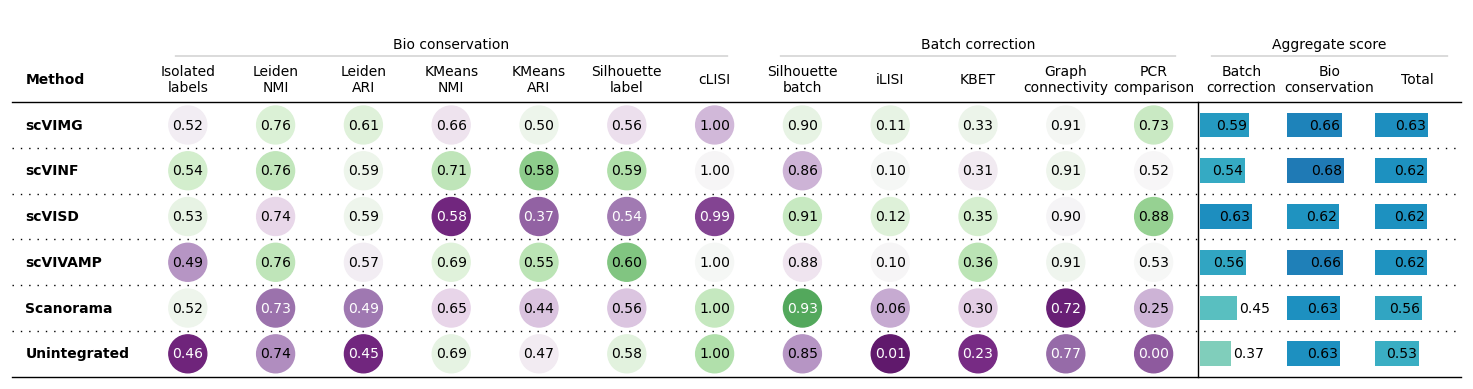

In [11]:
plotBenchmarkResults(allAdata,keys=["Unintegrated","Scanorama", "scVISD", "scVIMG", "scVIVAMP", "scVINF"])

In [1]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

In [ ]:
%reload_ext tensorboard